# 1. Sentiment Analysis:

Problem:

Analyzing sentiment in customer reviews, social media comments, or product feedback to determine whether the sentiment is positive, negative, or neutral.

Dataset:

IMDb movie reviews dataset

Twitter sentiment analysis dataset

Amazon product reviews dataset.

2. Text Classification:

Problem:

Categorizing text documents into predefined categories or classes, such as classifying news articles into topics like sports, politics, technology, etc.

Dataset:

20 Newsgroups dataset

Reuters news dataset

spam email classification dataset.

3. Named Entity Recognition (NER):

Problem:

Identifying and classifying entities mentioned in text, such as names of persons, organizations, locations, dates, etc.

Dataset:

CoNLL 2003 dataset

OntoNotes dataset

WikiNER dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Reddit_Data.csv')
data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
data.groupby('category').size()

category
-1     8277
 0    13142
 1    15830
dtype: int64

In [6]:
data.isna().sum()

clean_comment    100
category           0
dtype: int64

In [8]:
data.fillna('clean_comment', inplace=True)

In [9]:
data.isna().sum()

clean_comment    0
category         0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
category,37249.0,0.202771,0.778515,-1.0,0.0,0.0,1.0,1.0


In [12]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',data['clean_comment'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [13]:
corpus_dataset=pd.DataFrame(corpus)
corpus_dataset.head()

,0
0,famili mormon never tri explain still stare pu...
1,buddhism much lot compat christian especi cons...
2,serious say thing first get complex explain no...
3,learn want teach differ focu goal wrap paper b...
4,benefit may want read live buddha live christ ...


In [14]:
corpus_dataset['corpus']=corpus_dataset
corpus_dataset.head()

,0,corpus
0,famili mormon never tri explain still stare pu...,famili mormon never tri explain still stare pu...
1,buddhism much lot compat christian especi cons...,buddhism much lot compat christian especi cons...
2,serious say thing first get complex explain no...,serious say thing first get complex explain no...
3,learn want teach differ focu goal wrap paper b...,learn want teach differ focu goal wrap paper b...
4,benefit may want read live buddha live christ ...,benefit may want read live buddha live christ ...


In [15]:
corpus_dataset=corpus_dataset.drop([0],axis=1)
corpus_dataset.head()

,corpus
0,famili mormon never tri explain still stare pu...
1,buddhism much lot compat christian especi cons...
2,serious say thing first get complex explain no...
3,learn want teach differ focu goal wrap paper b...
4,benefit may want read live buddha live christ ...


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [19]:
x.shape

(1000, 4903)

In [18]:
len(cv.get_feature_names_out())

4903

In [20]:
y=data.iloc[:1000,1].values
y

array([ 1,  1, -1,  0,  1, -1,  1,  0, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  0,  0,  1, -1, -1,  1, -1,  0, -1, -1, -1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  0,  1,  1,  1,  1,
        0,  1,  0,  0,  1,  0, -1,  0,  0,  1,  0,  0,  1,  1,  1, -1, -1,
        1, -1, -1,  1,  1,  0, -1, -1,  1,  0, -1, -1,  1,  1, -1, -1,  1,
       -1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  0, -1,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,
        1, -1,  1,  0,  1, -1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  0, -1,  0, -1, -1, -1,  1,  0,  1,  1, -1,  0, -1,  1,  1,  0,
        1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1, -1,  0,
       -1,  1,  0,  0,  0,  0, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1, -1,
        0,  0,  1,  1,  1

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

from sklearn.naive_bayes import GaussianNB
gauss_clf=GaussianNB()

print('='*70)
print('Training started....  ')
gauss_clf.fit(xtrain,ytrain)
print('\ntesting in progress....')
ypred=gauss_clf.predict(xtest)
print('Predicted class:\n',ypred)
print('='*70)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion matrix:\n',confusion_matrix(ytest,ypred))
print('='*70)
print('Accuracy score:\t',accuracy_score(ytest,ypred))
print('='*70)
print('Classification report:\n',classification_report(ytest,ypred))
print('='*70)

Training started....  

testing in progress....
Predicted class:
 [ 1  1 -1  1 -1  0 -1  1  1  1  1 -1  1 -1  1  0  1  1  1 -1 -1  1  0 -1
  1  1  1 -1  1  0  1  1  0  1  1  1 -1  1 -1  0  1  1 -1  1  0 -1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  0 -1  1 -1  1 -1  1  1  1
 -1 -1  0  1  1 -1  1  0 -1  1 -1  1 -1  0 -1  1  1  0  0  1  1  1  1  1
  1  0  1  1 -1  1  1  1 -1  1  1  1  0  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1 -1  1  0  1  1  1  1  1  1  1  0  1  1  1  1
  1  1  1  1 -1  0 -1  1  1  0  1 -1  0  0  1  1  1  1 -1  0  1  1  1 -1
  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  0  0  1  0
  1  0  1  1  1 -1  1 -1]
Confusion matrix:
 [[11  3 27]
 [15 21 28]
 [15  2 78]]
Accuracy score:	 0.55
Classification report:
               precision    recall  f1-score   support

          -1       0.27      0.27      0.27        41
           0       0.81      0.33      0.47        64
           1       0.59      0.82      0.68        95

    

<Axes: >

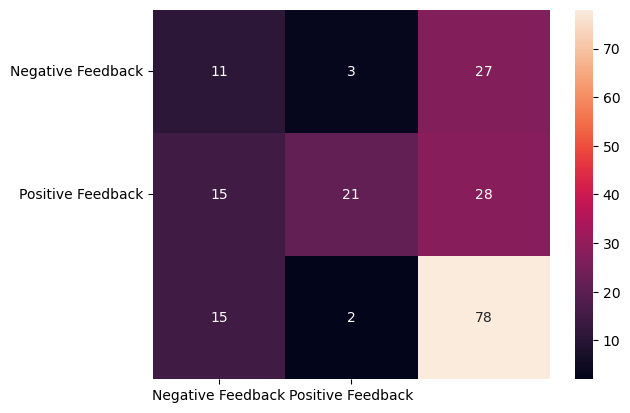

In [22]:
import seaborn as sns

cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True,xticklabels=['Negative Feedback','Positive Feedback'],
           yticklabels=['Negative Feedback','Positive Feedback'])

In [ ]:
#2

Predicted Categories for the first few test samples:
Document:
From: shippert@cco.caltech.edu (Tim Shippert)
Subject: Re: Infield Fly Rule
Organization: California Institute of Technology, Pasadena
Lines: 25
NNTP-Posting-Host: sandman.caltech.edu

jrogoff@scott.skidmore.edu (jay rogoff) writes:

>One last infield fly question that has always puzzled me and hasn't
>yet been addressed.  I believe the rule also does *not* deal with this
>situation:

>However, if the Infield Fly is *not* caught, at what point can a runner
>legally leave his base w/o fear of being doubled off for advancing too
>early?  

	The runner can leave his base at any time.  If the ball is caught,
he's got to tag up.  If it isn't caught, he _doesn't_ have to tag up at
all.  So, if he's feeling lucky, your runner at second can sprint for glory
as soon as the ball is popped up.  If it isn't caught, he's probably scored
a run.  If it is, he's probably headed for AAA.  

	The only effect the infield fly has is to make th

<Figure size 1400x1200 with 0 Axes>

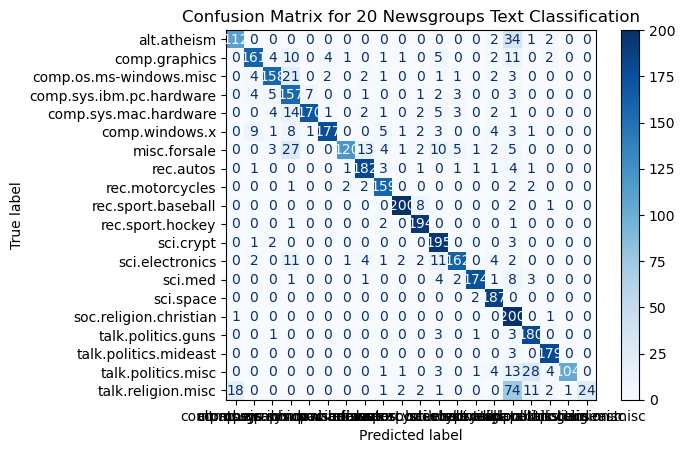

In [26]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a classifier (Naive Bayes classifier in this case)
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict on the test set
predicted = clf.predict(X_test_tfidf)

# Print the predicted categories for the first few test samples
print("Predicted Categories for the first few test samples:")
for doc, category in zip(X_test[:5], predicted[:5]):
    print(f"Document:\n{doc}\nPredicted Category: {newsgroups.target_names[category]}\n{'-'*50}")

# Generate and plot the confusion matrix heatmap
cm = confusion_matrix(y_test, predicted)
plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for 20 Newsgroups Text Classification')
plt.show()


# 3

In [1]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "C:\Users\SIRISHA\anaconda3\Lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\SIRISHA\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\SIRISHA\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\SIRISHA\anaconda3\Lib\site-packages\urllib3\connectionpool.py", line 714, in urlopen
    httplib_response = self._make_request(
                       ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = 'sirisha is employed at Mphasis Inc., a company headquartered in Pune'
doc = nlp(text)
for ent in doc.ents:
    print(f"Entity: {ent.text}, Type: {ent.label_}")


Entity: sirisha, Type: GPE
Entity: Mphasis Inc., Type: ORG
Entity: Pune, Type: LOC
